# dataset
- http://www.cis.upenn.edu/~jshi/ped_html/ 52MB /media/sdb/CVDataset/ObjectDetection/PennFudanPed Penn-Fudan Database for Pedestrian Detection and Segmentation
- http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=2d 12GB(dowqloaded in /media/sdb/CVDataset/ObjectDetection/KITTI)
- http://cocodataset.org/#download /media/sdb/CVDataset/ObjectSegmentation/coco

In [1]:
import sys
sys.path.insert(0,os.path.expanduser('~/git/torchdet'))
print(sys.path)

import os
os.chdir(os.path.expanduser('~/git/torchdet'))

['/home/yzbx/git/torchdet', '', '/home/yzbx/git/torchdet/notebooks', '/home/yzbx/git/gnu/models/research', '/home/yzbx/git/gnu/models/research/slim', '/home/yzbx/bin/miniconda3/envs/env3_tf1.8/lib/python36.zip', '/home/yzbx/bin/miniconda3/envs/env3_tf1.8/lib/python3.6', '/home/yzbx/bin/miniconda3/envs/env3_tf1.8/lib/python3.6/lib-dynload', '/home/yzbx/.local/lib/python3.6/site-packages', '/home/yzbx/bin/miniconda3/envs/env3_tf1.8/lib/python3.6/site-packages', '/home/yzbx/bin/miniconda3/envs/env3_tf1.8/lib/python3.6/site-packages/cityscapesscripts-1.0.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/env3_tf1.8/lib/python3.6/site-packages/pycocotools-2.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages', '/home/yzbx/git/gnu/maskrcnn-benchmark', '/home/yzbx/bin/miniconda3/envs/env3_tf1.8/lib/python3.6/site-packages/IPython/extensions', '/home/yzbx/.ipython']


In [2]:
from dataset.coco import CocoDataset
from dataset.det2seg import Det2Seg
import matplotlib.pyplot as plt

coco_root_dir='dataset/coco'
coco_dataset=CocoDataset(root_dir=coco_root_dir,set_name='train2014')
d=Det2Seg(coco_dataset)
img,overlap_map=d.vis(5)
plt.imshow(img)
plt.imshow(overlap_map)

loading annotations into memory...
Done (t=7.65s)
creating index...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


index created!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


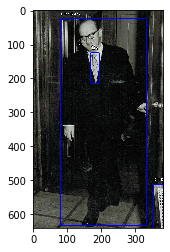

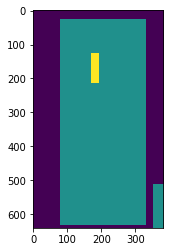

In [3]:
plt.imshow(img)
plt.show()
plt.imshow(overlap_map)
plt.show()